Lets look at a scenarion where we can recognize different items of clothing trained from a dataset containg 70,000 items of clothing in 10 different categories.

Fashion-MNIST is an inbuilt dataset in keras and lets try to train the Neural Neteork model to recognize all the items of the clothing from the dataset.


Each item of clothing is 28x28 greyscale image.

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

The Fashion-MNIST dataset is available directly in the tf.keras datasets API. we can load it like this.

In [0]:
mnist = tf.keras.datasets.fashion_mnist


Calling **load_data** in this object will give two sets of two lists, there will be the training and the testing values for the graphics that contains the clothing items and their labels

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

To see what the values look like, let's print a training image and a training label to see

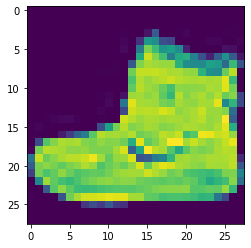

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])


In [0]:
# plt.imshow(training_images[1])

In [6]:
print(training_images[0])
print(training_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

The label for the boot is 9.
Since its a greyscale image the values are in between 0 to 255.
You can also see the shape of the boot as in 0 represents black and the rest denotes other colours.

While training a neural network, its easier if we treat all the values in b/w 0 to 1, a process called **normalizing**

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Designing the model

In the defenition we'll have three layers,

In [0]:
model = tf.keras.models.Sequential([
                          tf.keras.layers.Flatten(input_shape = (28,28)), # Layer 1
                          tf.keras.layers.Dense(128, activation = tf.nn.relu), # Layer 2
                          tf.keras.layers.Dense(10, activation = tf.nn.softmax) # Layer 3
])

**Layer 1**
is Flatten. There are no neurons here. The idea of the function is to take the rectangular shape of the data (28x28) and flatten that into 1D array, that can be processed by he next layer.

**Layer 2**
Flatten layer is followed by a Dense Layer, there are 128 neurons in this layer. The activation function used here is relu. Layers of Tensorflow can have an activation run on them, they are calld and executed while the network is learning. The "relu" activation function is used to cancel out the -ve numbers so that it wont skew results downstream and canceling out positive o/ps elsewhere.

**Layer 3**
The third Dense layer has 10 neurons and those are the output denoting each class. The actovation functionused is softmax, they are commonly seen on the final layers if there are multiple categories to simply find the most likely candidate. Basicall "softmax" will set the largest to 1 and the rest to 0, ie, to the correct class which is 1.

**sequential** 
That defines a Sequence of layers in the Neural Network.

**Flatten**
Earlier we saw our square image right? Here Flatten just take the square and Flattens it out into 1 dimensional set.

**Dense** 
As we already know, it adds up layer of neurons
Each laer of neurons need activation functions to tell the what to do.

**Relu** effectively means "if X>0, return X, else return 0", so what it does is it passes only 0 or greater to th next layer of neuron.

**Softmax** takes a set of values and effectively picks the biggest one.

If the o/p of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05, 0.1], softmax turns that into [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],basically taking the highest values into 1 and lowest into 0.



After defining the model, while building the model, we do this by compiling it with an optimizer and a loss function and train the by calling **model.fit** asking it to fit the training data into training labels.
Ie, basically figuring out the relationship b/w the training data and its actual labels, so that in the future if we have a data that looks like the training data then it can make a prediction what data could look like. 

In [9]:
# building the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] # accuracy is a classification metric, used for multiclass classification problems.
)

# training the data into labels
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4971 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3361 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3110 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8918


The accuracy value is shown at the end of the epoch.
in this example, it tells us that it is 89% accurate in classifying the training data. ie, it figure out the pattern match between the images and labels that worked 89% of the time. This can be tunes into further accuracy using various methods.


Now lets evaluate it with the test data

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8717


[0.3513234257698059, 0.8716999888420105]

The accuracy on the unseen data is 87%

## Exploraion Exercises

For the first exercise run the code below. It creates a classification for each of the images and then print the first entry in the classifications. The o/p after you run this is a list of numbers. Why do you think this is and what do those numbers represent? 

In [11]:
classifications = model.predict(test_images)
print(classifications[0])

[2.8508205e-07 2.9060205e-08 4.7602477e-08 4.4257780e-09 3.0908950e-08
 2.1962801e-03 1.7724186e-07 5.1873367e-02 1.6903095e-06 9.4592816e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

In [12]:
print(test_labels[0])

9


What does this list represent?

1)It's 10 random meaningless values

2)It's the first 10 classifications that the computer made

3)It's the probability that this item is each of the 10 classes

Answer:

The correct answer is 3.

The o/p of the model is a list of 10 numbers. These numbers shows the probability that the classified value is that value with the highest probability. i.e. the first value in the list is that the probability that the image of the item belongs to '0', the next is '1'.etc.

## How do you know that this list tells you that the item is an ankle boot?

1)There's not enough information to answer that question

2)The 10th element on the list is the biggest, and the ankle boot is labelled 9

3)The ankle boot is label 9, and there are 0->9 elements in the list

Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

# Exercise 2

Let's now look at the layers in the model.
Experiment with different values for the dense layer 512 neurons. What different results do you get for loss, trainig time etc? Why do you think thats the case?

In [0]:
# importing the package
import tensorflow as tf
print(tf.__version__)

# loading the fashion_mnist dataset from the keras datasets API
mnist = tf.keras.datasets.fashion_mnist

# Loading the imges into training and tesing part
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalizing the training and testing images
training_images = training_images/255.0
test_images - test_images/255.0

# Designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(1024, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)])

# Building/compiling the model
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy')

# Training the data into labels
model.fit(training_images, training_labels, epochs= 5)

# Evaluating the model with the test data
model.evaluate(test_images, test_labels)

# classificaions and prediction
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Question 1. Increase to 1024 Neurons -- What's the impact?

1)Training takes longer, but is more accurate

2)Training takes longer, but no impact on accuracy

3)Training takes the same time, but is more accurate


## Answer

The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the **law of diminishing returns** very quickly!

# Exercise 3

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                    
])

# model without the Flatten Layer
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation = tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)                                    
# ])

model.compile(optimizer= 'adam',loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(64, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                    ])

# the model with 5 o/p neurons
# model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
#                                    tf.keras.layers.Dense(64, activation= tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation= tf.nn.softmax)
#                                    ])

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data, extra layers are often necessary.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                    ])

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#Exercise 6:

Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                    ])

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=100)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4702
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3533
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3223
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2784
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2637
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2490
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2398
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2281
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2211
Epoch 11/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2119
Epoch 12/100
1875/1875 [==============================] - 3s 2ms/ste

#Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

Ans: Normalizing the data generally speeds up learning and leads to faster convergence.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# comment the following 2 lines for the experiment
# training_images = training_images/255.0
# test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(256, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                                    ])

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])